In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Drowsiness2.zip -d /content/Untitled

Streaming output truncated to the last 5000 lines.
  inflating: /content/Untitled/data/train/open eyes/s0036_05431_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05432_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05433_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05434_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05435_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05436_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05437_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05438_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05439_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05440_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/train/open eyes/s0036_05441_1_1_1_0_0_01.png  
  inflating: /content/Untitled/data/

In [ ]:
path = '/content/Untitled/data'

train_dir = os.path.join(path, 'train')

test_dir = os.path.join(path, 'test')

print(train_dir)

print(test_dir)

print(os.listdir(train_dir))


/content/Untitled/data/train
/content/Untitled/data/test
['close eyes', 'open eyes']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split
path = '/content/Untitled/data'
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
print(train_dir)
print(test_dir)
print(os.listdir(train_dir))

/content/Untitled/data/train
/content/Untitled/data/test
['close eyes', 'open eyes']


In [ ]:
# Hyperparams
IMAGE_SIZE = 128
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 10
BATCH_SIZE = 16
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
# data generators
training_data_generator = ImageDataGenerator(
 rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
# Data preparation
training_generator = training_data_generator.flow_from_directory(
 train_dir,
 target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
 batch_size=BATCH_SIZE,
 class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
 test_dir,
 target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
 batch_size=BATCH_SIZE,
 class_mode="binary")
sample, label = next(validation_generator)
print(sample[0])
print(label[0])

Found 81675 images belonging to 2 classes.
Found 3223 images belonging to 2 classes.
[[[0.3372549  0.3372549  0.3372549 ]
  [0.3529412  0.3529412  0.3529412 ]
  [0.34117648 0.34117648 0.34117648]
  ...
  [0.24705884 0.24705884 0.24705884]
  [0.24705884 0.24705884 0.24705884]
  [0.24313727 0.24313727 0.24313727]]

 [[0.34117648 0.34117648 0.34117648]
  [0.34509805 0.34509805 0.34509805]
  [0.34117648 0.34117648 0.34117648]
  ...
  [0.24705884 0.24705884 0.24705884]
  [0.2509804  0.2509804  0.2509804 ]
  [0.2509804  0.2509804  0.2509804 ]]

 [[0.34117648 0.34117648 0.34117648]
  [0.34117648 0.34117648 0.34117648]
  [0.34509805 0.34509805 0.34509805]
  ...
  [0.24705884 0.24705884 0.24705884]
  [0.2509804  0.2509804  0.2509804 ]
  [0.25882354 0.25882354 0.25882354]]

 ...

 [[0.29803923 0.29803923 0.29803923]
  [0.29803923 0.29803923 0.29803923]
  [0.2901961  0.2901961  0.2901961 ]
  ...
  [0.3019608  0.3019608  0.3019608 ]
  [0.29411766 0.29411766 0.29411766]
  [0.29411766 0.29411766 0.2

In [ ]:
# model
model = Sequential()
model.add(Conv2D(32, 3, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
# model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
# compile model
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])
print(len(training_generator.filenames))

81675


In [ ]:
# train model
history=model.fit(
 training_generator,
 epochs=EPOCHS,
 validation_data=validation_generator,
)
model.save('/content/drive/MyDrive/models/Drowsiness_model.h5')
# validation_steps=len(validation_generator.filenames) // BATCH_SIZE
model = tf.keras.models.load_model('/content/drive/MyDrive/models/Drowsiness_model.h5')

Epoch 1/10
5105/5105 [==============================] - 418s 79ms/step - loss: 0.1843 - accuracy: 0.9281 - val_loss: 0.2874 - val_accuracy: 0.9231
Epoch 2/10
5105/5105 [==============================] - 428s 84ms/step - loss: 0.0895 - accuracy: 0.9687 - val_loss: 0.2411 - val_accuracy: 0.9289
Epoch 3/10
5105/5105 [==============================] - 397s 78ms/step - loss: 0.0720 - accuracy: 0.9750 - val_loss: 0.1805 - val_accuracy: 0.9258
Epoch 4/10
5105/5105 [==============================] - 382s 75ms/step - loss: 0.0646 - accuracy: 0.9777 - val_loss: 0.0913 - val_accuracy: 0.9606
Epoch 5/10
5105/5105 [==============================] - 394s 77ms/step - loss: 0.0615 - accuracy: 0.9791 - val_loss: 0.1934 - val_accuracy: 0.9218
Epoch 6/10
5105/5105 [==============================] - 398s 78ms/step - loss: 0.0567 - accuracy: 0.9810 - val_loss: 0.1792 - val_accuracy: 0.9355
Epoch 7/10
5105/5105 [==============================] - 395s 77ms/step - loss: 0.0526 - accuracy: 0.9818 - val_loss: 0

1/1 [==============================] - 0s 35ms/step
[[9.9999988e-01]
 [1.1981489e-04]
 [9.8887092e-01]
 [5.6507899e-05]
 [9.9966264e-01]
 [1.0000000e+00]
 [9.9855345e-01]
 [2.7292269e-01]
 [1.0371711e-03]
 [9.9919218e-01]
 [4.3260530e-04]
 [1.7000627e-03]
 [8.1681032e-03]
 [5.1739771e-04]
 [6.5891718e-04]
 [3.2096416e-02]]
1/1 [==============================] - 0s 33ms/step
prediction: Closed_Eyes 98%
actual: Closed_Eyes


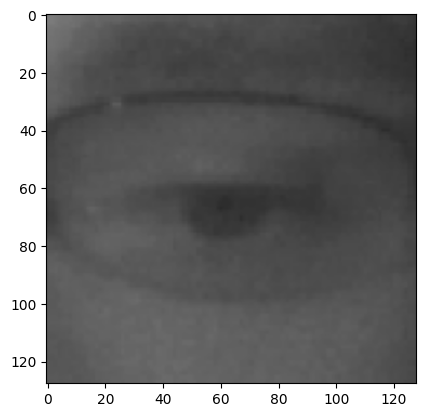

prediction: Open_Eyes 100%
actual: Open_Eyes


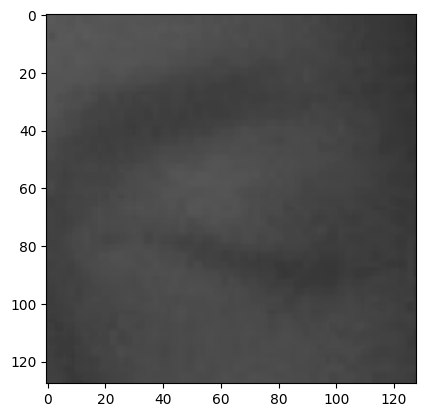

prediction: Open_Eyes 100%
actual: Open_Eyes


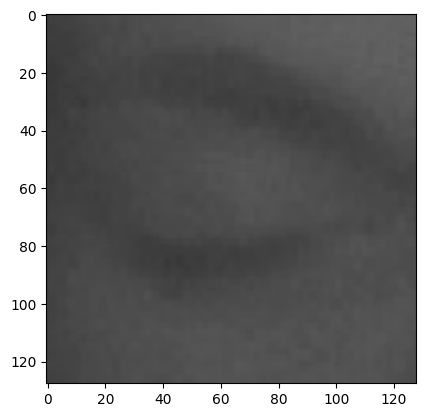

prediction: Open_Eyes 100%
actual: Open_Eyes


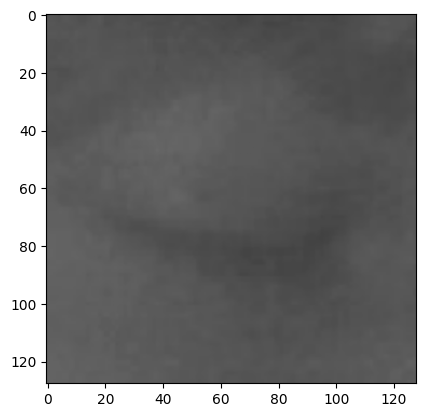

prediction: Closed_Eyes 99%
actual: Closed_Eyes


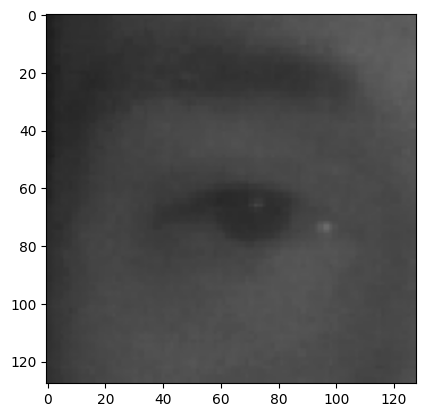

prediction: Open_Eyes 100%
actual: Open_Eyes


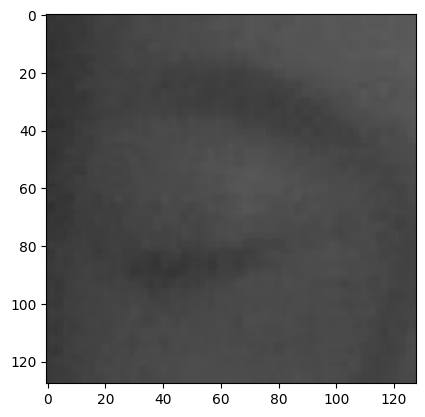

prediction: Open_Eyes 100%
actual: Open_Eyes


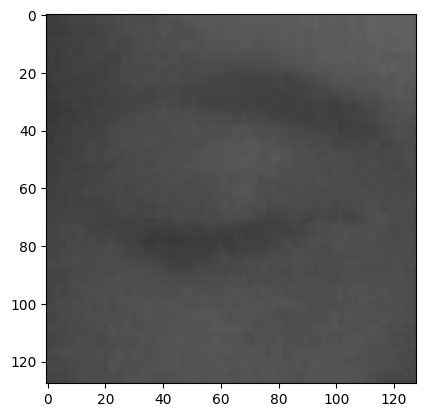

prediction: Closed_Eyes 99%
actual: Closed_Eyes


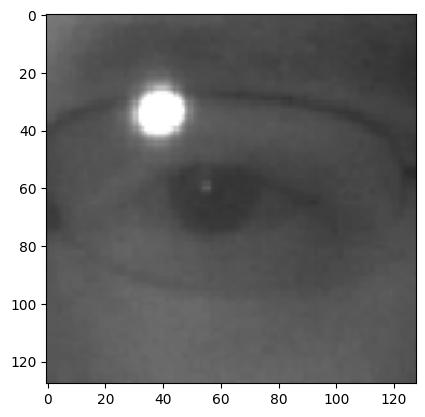

prediction: Open_Eyes 100%
actual: Open_Eyes


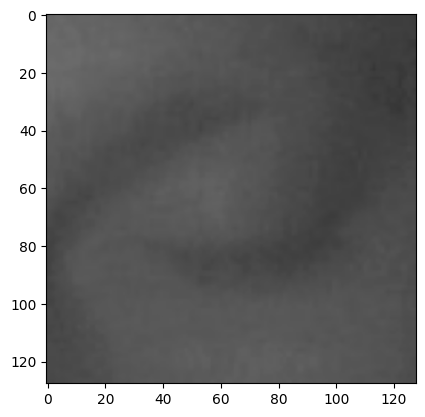

prediction: Open_Eyes 100%
actual: Open_Eyes


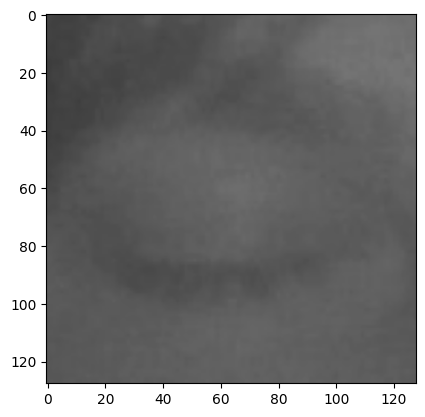

prediction: Closed_Eyes 99%
actual: Closed_Eyes


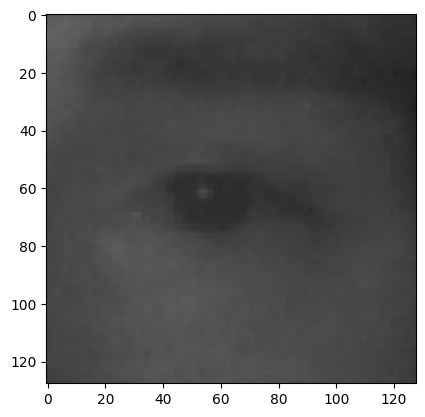

prediction: Open_Eyes 100%
actual: Open_Eyes


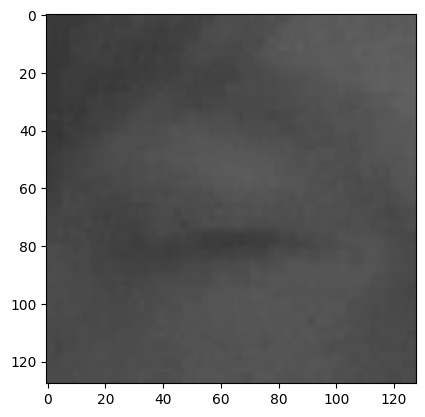

prediction: Closed_Eyes 99%
actual: Closed_Eyes


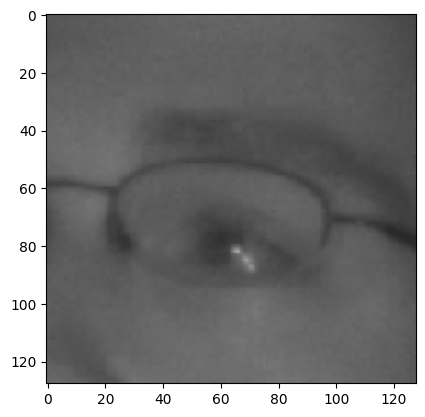

prediction: Closed_Eyes 100%
actual: Closed_Eyes


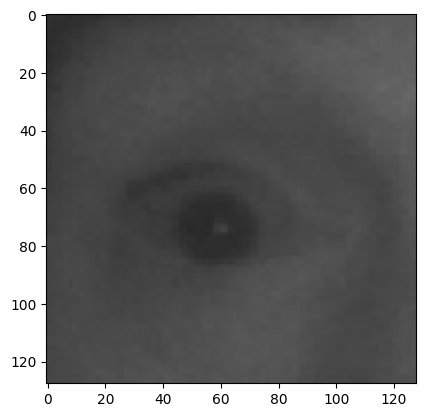

prediction: Open_Eyes 100%
actual: Open_Eyes


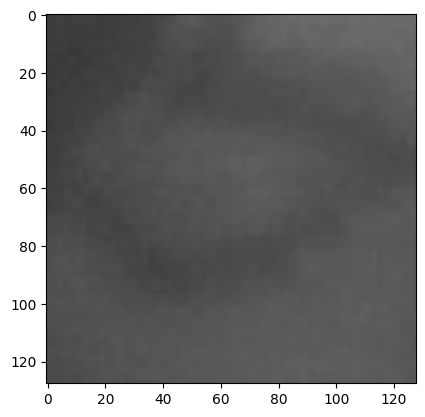

prediction: Open_Eyes 100%
actual: Open_Eyes


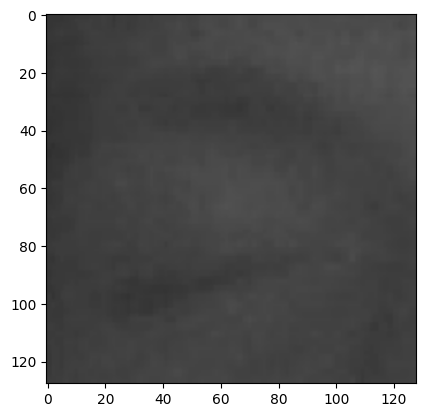

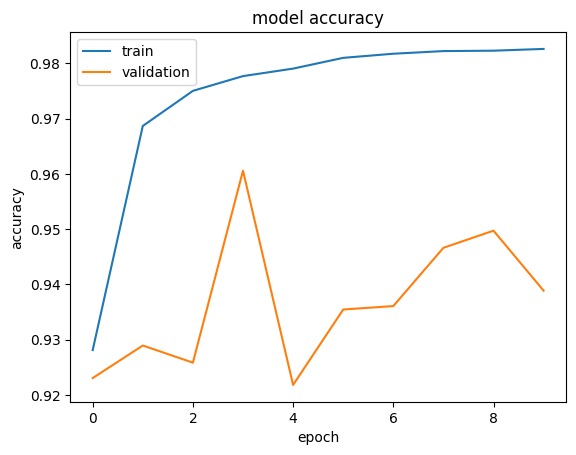

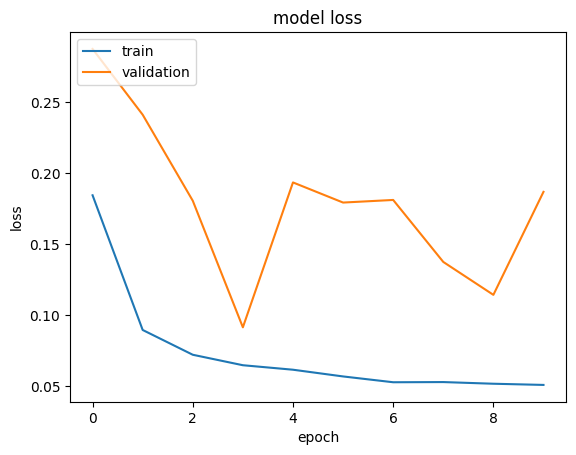

In [ ]:
sample1, label1 = next(validation_generator)
predictions = model.predict(sample1)
print(predictions)

def check_results():
    class_names = [ 'Open_Eyes', 'Closed_Eyes']
    sample1, label1 = next(validation_generator)
    predictions = model.predict(sample1)
    for num in range(len(predictions)):
        if predictions[num] > 0.5: 
            print('prediction: '+'Closed_Eyes'+' ' + str(int(predictions[num]*100))+ '%')
        else: 
            print('prediction: '+'Open_Eyes'+' ' + str(100- int(predictions[num]*100))+ '%')
          
        print('actual: '+ class_names[int(label1[num])])
        plt.imshow(sample1[num])
        plt.show()
        
check_results()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()